# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits merge on year and country
merge_share_ewcs("3digits_year_country.csv", convert_to_3_digits=True)
# 3 digits on year only
merge_share_ewcs("3digits_year.csv", convert_to_3_digits=True, not_country_wise=True)
# 4 digits merge on year and country
merge_share_ewcs("4digits_year_country.csv", convert_to_3_digits=False)
# 4 digits on year only
merge_share_ewcs("4digits_year.csv", convert_to_3_digits=False, not_country_wise=True)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_year_country : 3404 unique ids
4digits_year_country : 2758 unique ids
3digits_year : 3944 unique ids
4digits_year : 3915 unique ids


In [4]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_year.csv"
)

In [5]:
len(df)

5310

In [6]:
df.mergeid.nunique()

3915

In [7]:
df.groupby("year").mergeid.nunique()

year
2011    2152
2015    3158
Name: mergeid, dtype: int64

In [8]:
df.groupby(["country", "year"])[
    ["retirement_age", "retirement_age_early", "retirement_age_minimum"]
].min()

retirement_age  retirement_age_early  \
country        year                                         
Austria        2011           60.00                  57.0   
               2015           60.00                  59.0   
Belgium        2011           65.00                  60.0   
               2015           65.00                  60.0   
Czech Republic 2011           57.00                  54.0   
               2015           58.00                  60.0   
Denmark        2011           65.00                   NaN   
               2015           65.00                   NaN   
Estonia        2011           61.00                  58.0   
               2015           62.50                  59.5   
France         2011           61.67                   NaN   
               2015           62.00                   NaN   
Germany        2011           65.00                  63.0   
               2015           65.17                  63.0   
Greece         2015           67.00                  56.0   
Hungary        2011           63.50                  57.0   
Italy          2011           60.00                  60.0   
               2015           63.75                  60.6   
Luxembourg     2015           65.00                  57.0   
Netherlands    2011           65.00                   NaN   
Poland         2011           60.00                   NaN   
               2015           60.67                   NaN   
Portugal       2011           65.00                  55.0   
               2015           66.00                  60.0   
Slovenia       2011           63.00                  58.0   
               2015           65.00                  60.0   
Spain          2011           65.00                   NaN   
               2015           65.25                   NaN   
Sweden         2011           65.00                  61.0   
               2015           65.00                  61.0   
Switzerland    2011           63.00                  62.0   
               2015           63.00                  62.0   

                     retirement_age_minimum  
country        year                          
Austria        2011                   57.00  
               2015                   59.00  
Belgium        2011                   60.00  
               2015                   60.00  
Czech Republic 2011                   54.00  
               2015                   58.00  
Denmark        2011                   65.00  
               2015                   65.00  
Estonia        2011                   58.00  
               2015                   59.50  
France         2011                   61.67  
               2015                   62.00  
Germany        2011                   63.00  
               2015                   63.00  
Greece         2015                   56.00  
Hungary        2011                   57.00  
Italy          2011                   60.00  
               2015                   60.60  
Luxembourg     2015                   57.00  
Netherlands    2011                   65.00  
Poland         2011                   60.00  
               2015                   60.67  
Portugal       2011                   55.00  
               2015                   60.00  
Slovenia       2011                   58.00  
               2015                   60.00  
Spain          2011                   65.00  
               2015                   65.25  
Sweden         2011                   61.00  
               2015                   61.00  
Switzerland    2011                   62.00  
               2015                   62.00

In [9]:
df.job_status = df.job_status.replace(
    {"Employee": "Private sector employee", "Civil servant": "Public sector employee"}
)
dummy_df = pd.get_dummies(df["job_status"], prefix="Category").astype(int)
dummy_df.describe()

,Category_Private sector employee,Category_Public sector employee,Category_Self-employed
count,5310.000000,5310.000000,5310.000000
mean,0.599623,0.275895,0.124482
std,0.490021,0.447006,0.330162
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [10]:
round(df.groupby("year").jqi_physical_environment.describe(), 2)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,2152.0,86.64,15.40,28.44,78.43,86.9,93.93,159.16
2015,3158.0,86.82,16.51,11.33,75.65,87.6,98.07,208.55


In [11]:
len(df[df.work_horizon_change > 0]) / len(df)

0.45329566854990583

In [12]:
df["work_horizon_change_bin"] = (df["work_horizon_change"] > 0).astype(int)

In [13]:
df.chronic.describe()

count    5310.000000
mean        0.993409
std         1.103324
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: chronic, dtype: float64

Number of unique IDs: 3915
Number of unique IDs by country:
country
Austria           279
Belgium           586
Czech Republic    324
Denmark           182
Estonia           429
France            230
Germany           338
Greece             42
Hungary            34
Italy             277
Luxembourg        112
Netherlands        20
Poland             80
Portugal          105
Slovenia          320
Spain              17
Sweden            191
Switzerland       349
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    2152
2015    3158
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  5310.00  5310.00      5310.00       5310.00
mean     56.19     0.54         1.82         12.35
std       2.92     0.50         1.25          4.58
min      51.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         10.59
50%      56.00     1.00         2.00         12.00
75%      58.00     1.00         2.00         15

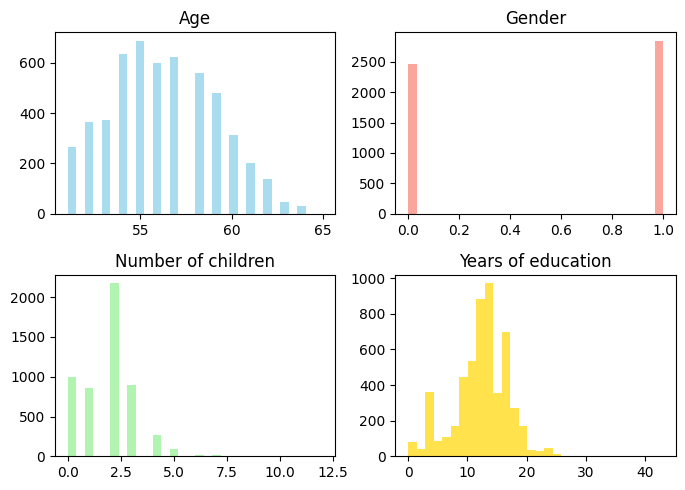


Job Status:
job_status
Private sector employee    0.60
Public sector employee     0.28
Self-employed              0.12
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.14
Other community                                 0.13
Manufacturing                                   0.13
Education                                       0.12
Public administration and defence               0.11
Wholesale and retail trade                      0.10
Transport, storage and communication            0.06
Construction                                    0.06
Agriculture, hunting, forestry, fishing         0.04
Financial intermediation                        0.04
Hotels and restaurants                          0.02
Electricity, gas and water supply               0.02
Real estate, renting and business activities    0.02
Mining and quarrying                            0.01
Other                                           0.01
Name: proportion, 

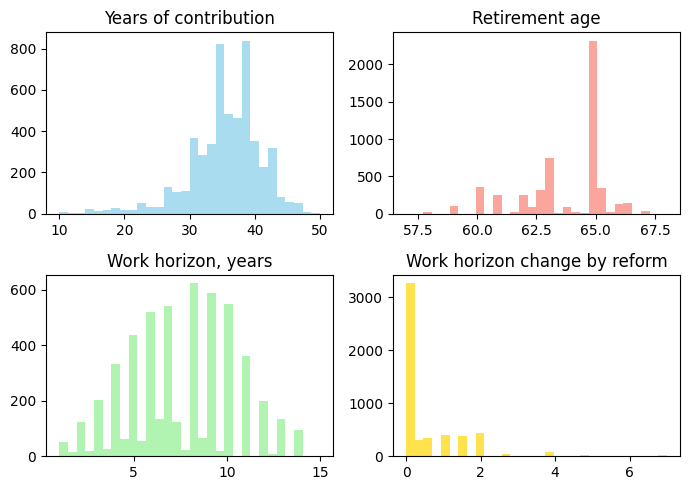


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.39
1       0           0.36
0       1           0.20
1       1           0.05
0       Refusal     0.00
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.8
1    0.2
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1349
1.0     1257
2.0      977
3.0      687
4.0      467
5.0      287
6.0      152
7.0       80
8.0       27
9.0       15
10.0       9
11.0       2
12.0       1
Name: count, dtype: int64


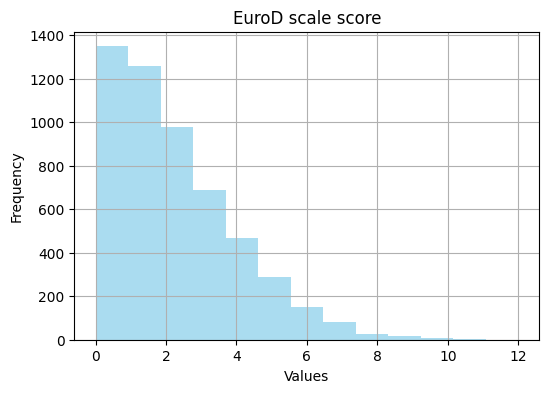


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    5310.00                     5310.00   
mean                     1434.95                       59.04   
std                       466.30                       13.20   
min                       242.26                       26.49   
25%                      1118.46                       48.81   
50%                      1373.55                       58.18   
75%                      1659.57                       70.04   
max                      6766.63                       88.29   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      5310.00                        5310.00   
mean                         82.22                          83.85   
std                           4.20                           8.93   
min                          45.45                          33.33   
25%                          80.44                       

In [14]:
describe_data(df)

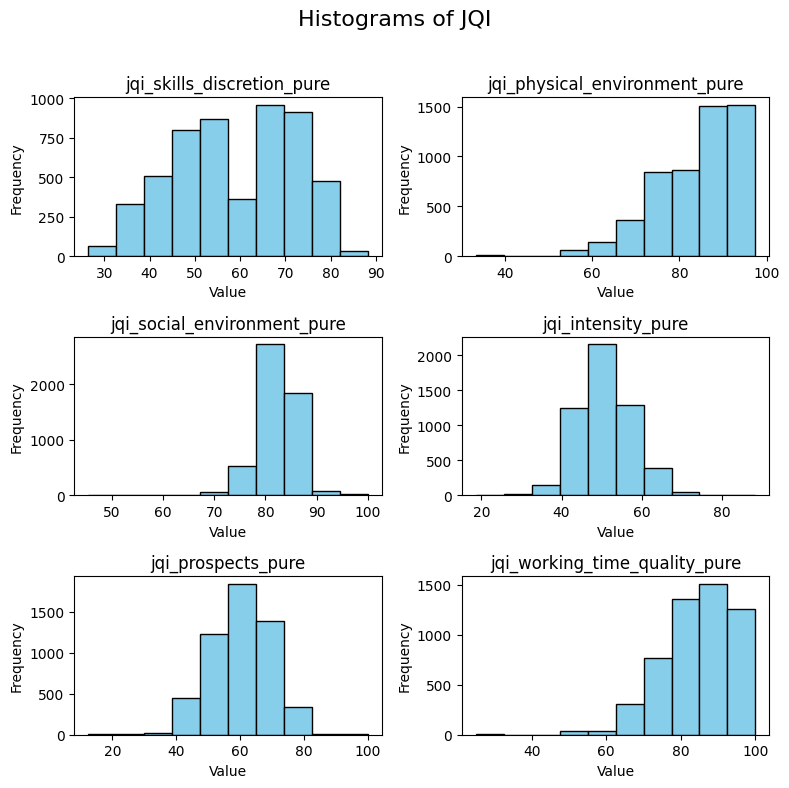

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()